In [1]:
# load pandas so we can muck with the data
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
# Load the scorecard data
scorecard = pd.read_csv("https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv",
                        low_memory=False)
scorecard.shape

(7703, 1743)

#### Possible questions from PublicSource
* How many students in Pittsburgh receive Pell grants? How does this body of students break down demographically? (Race, family income level, in-state v. out-of-state, etc.)
* Are students who receive Pell grants moving through school with their peers and graduating on time? 
* Has the total number of Pell students increased or decreased over time? 
* How many students in Pittsburgh graduate on time? How many graduate with debt? How many students default on their loans? 


#### Check out the data dictionary

* [Here is a link to the Data Dictionary on Google Drive](https://docs.google.com/spreadsheets/d/1gSnivIY8KlMlqID0uWPyVhdPnLEgxpTpZwsMzBwlo28/edit#gid=551994898)

#### A few variables of interest:

```

ST_FIPS                       Code for state (PA is 42)
CITY                          City name (e.g., "Pittsburgh")

PELL_DEATH_YR2_RT             % Pell students dead w/in 2 yrs
PELL_COMP_ORIG_YR2_RT         % Pell students complete w/in 2 yrs
PELL_COMP_4YR_TRANS_YR2_RT    % Pell students transfered to 4yr inst w/in 2 yrs
PELL_COMP_2YR_TRANS_YR2_RT    % Pell students transfered to 2yr inst w/in 2 yrs

NOPELL_DEATH_YR2_RT           % NoPell students dead w/in 2 yrs
NOPELL_COMP_ORIG_YR2_RT       % NoPell students complete w/in 2 yrs
NOPELL_COMP_4YR_TRANS_YR2_RT  % NoPell students transfered to 4yr inst w/in 2 yrs
NOPELL_COMP_2YR_TRANS_YR2_RT  % NoPell students transfered to 2yr inst w/in 2 yrs

```


In [8]:
# Create mask for PA schools
pa_mask = scorecard['ST_FIPS'] == 42

pa_schools = scorecard[pa_mask].copy()

pa_schools

,﻿UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
3158,210456,708700,7087,Abington Memorial Hospital Dixon School of Nur...,Willow Grove,PA,19090-1284,Accreditation Commission for Education in Nurs...,www.amhdixonson.org,www.amhdixonson.org,...,NaN,NaN,NaN,NaN,NaN,2,0.1384,0.8616,NaN,82
3159,210474,2178900,21789,Jolie Hair and Beauty Academy-Hazleton,Hazleton,PA,18201,National Accrediting Commission of Cosmetology...,www.jolieacademy.com,www.schooliya.com/Pioneer/Hazleton/netpricecal...,...,67,NaN,NaN,0.0000,67,3,0.2346,0.7654,42,32
3160,210483,2234200,22342,Keystone Technical Institute,Harrisburg,PA,17112-1012,Accrediting Commission of Career Schools and C...,www.kti.edu,www.kti.edu,...,318,NaN,NaN,0.0692,318,2,0.2669,0.7331,300,210
3161,210492,322800,3228,Bryn Athyn College of the New Church,Bryn Athyn,PA,19009-0717,Middle States Commission on Higher Education,www.brynathyn.edu,www.brynathyn.edu/admissions/finance/aid/calcu...,...,NaN,0.3095,42,NaN,NaN,1,0.5018,0.4982,32,40
3162,210508,3353300,33533,Academy of Vocal Arts,Philadelphia,PA,19103-6685,National Association of Schools of Music,www.avaopera.org,www.avaopera.org,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,17,3
3163,210571,322900,3229,Albright College,Reading,PA,19612-5234,Middle States Commission on Higher Education,www.albright.edu,https://albright.studentaidcalculator.com/surv...,...,NaN,0.0000,505,NaN,NaN,1,0.4162,0.5838,750,669
3164,210599,2495500,24955,All-State Career School-Lester,Lester,PA,19029,Accrediting Commission of Career Schools and C...,www.allstatecareer.edu,www.allstatecareeredu.info/,...,559,NaN,NaN,0.0000,559,3,0.9427,0.0573,954,966
3165,210605,323100,3231,Community College of Allegheny County,Pittsburgh,PA,15233-1895,Middle States Commission on Higher Education,www.ccac.edu,https://webapps.ccac.edu/NetPriceCalc/npcalc.htm,...,2730,NaN,NaN,0.2407,2730,2,0.4234,0.5766,3352,3006
3166,210669,323000,3230,Allegheny College,Meadville,PA,16335-3902,Middle States Commission on Higher Education,www.allegheny.edu,www.allegheny.edu/netpricecalculator,...,NaN,0.0000,562,NaN,NaN,1,0.4543,0.5457,540,453
3167,210711,2144000,21440,Toni & Guy Hairdressing Academy-Allentown,Allentown,PA,18109-1629,National Accrediting Commission of Cosmetology...,www.tghairacademy.edu,www.tghairacademy.edu,...,83,NaN,NaN,0.0000,83,3,0.0698,0.9302,79,89


In [9]:


# Create a mask for Pittsburgh schools
pgh_schools = scorecard[scorecard['CITY'] == "Pittsburgh"].copy()
pgh_schools

,﻿UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
3165,210605,323100,3231,Community College of Allegheny County,Pittsburgh,PA,15233-1895,Middle States Commission on Higher Education,www.ccac.edu,https://webapps.ccac.edu/NetPriceCalc/npcalc.htm,...,2730,NaN,NaN,0.2407,2730,2,0.4234,0.5766,3352,3006
3176,210960,747000,7470,The Art Institute of Pittsburgh,Pittsburgh,PA,15219-1328,Middle States Commission on Higher Education,artinstitutes.edu/pittsburgh/,tcc.noellevitz.com:80/edmc/Freshman-Students%2...,...,NaN,0.0000,454,NaN,NaN,1,0.4848,0.5152,13283,13698
3182,211149,3101500,31015,Bidwell Training Center Inc,Pittsburgh,PA,15233,NaN,www.bidwell-training.org,www.bidwell-training.org/calculator/npcalc.htm,...,40,NaN,NaN,0.0000,40,2,0.4201,0.5799,NaN,NaN
3184,211200,972100,9721,Bradford School,Pittsburgh,PA,15219,Accrediting Council for Independent Colleges a...,www.bradfordpittsburgh.edu,www.bradfordpittsburgh.edu/aid,...,226,NaN,NaN,0.0000,226,2,0.2881,0.7119,344,334
3194,211431,330300,3303,Carlow University,Pittsburgh,PA,15213-3165,Middle States Commission on Higher Education,www.carlow.edu,www.carlow.edu/Net_Price_Calculators.aspx,...,NaN,0.0000,226,NaN,NaN,1,0.1013,0.8987,796,780
3195,211440,324200,3242,Carnegie Mellon University,Pittsburgh,PA,15213-3890,Middle States Commission on Higher Education,www.cmu.edu/,admission.enrollment.cmu.edu/pages/financial-a...,...,NaN,0.0000,1462,NaN,NaN,1,0.5668,0.4332,1432,1362
3198,211556,324400,3244,Chatham University,Pittsburgh,PA,15232,Middle States Commission on Higher Education,www.chatham.edu,www.chatham.edu/calculator/,...,NaN,0.3011,176,NaN,NaN,1,0.0268,0.9732,741,635
3207,211909,918600,9186,Dean Institute of Technology,Pittsburgh,PA,15226-1197,Accrediting Commission of Career Schools and C...,www.deantech.edu,www.deantech.edu,...,50,NaN,NaN,0.0000,50,2,0.9819,0.0181,78,114
3215,212090,709100,7091,Everest Institute-Pittsburgh,Pittsburgh,PA,15222-1320,NaN,www.everest.edu/campus/pittsburgh,www.Everest.edu/npc,...,361,NaN,NaN,0.0000,361,2,0.2490,0.7510,610,724
3216,212106,325800,3258,Duquesne University,Pittsburgh,PA,15282,Middle States Commission on Higher Education,www.duq.edu,www.duq.edu/admissions-and-aid/tuition/net-pri...,...,NaN,0.0000,1425,NaN,NaN,1,0.3907,0.6093,2435,2201


In [46]:
vars_YR2 = ['PCTPELL', 'PELLEVER', 'PELL_YR2_N', 'NOPELL_YR2_N', 
          'PELL_COMP_ORIG_YR2_RT', 'PELL_COMP_4YR_TRANS_YR2_RT', 'PELL_COMP_2YR_TRANS_YR2_RT',
          'NOPELL_COMP_ORIG_YR2_RT', 'NOPELL_COMP_4YR_TRANS_YR2_RT', 'NOPELL_COMP_2YR_TRANS_YR2_RT',
          'PELL_ENRL_ORIG_YR2_RT', 'PELL_ENRL_4YR_TRANS_YR2_RT', 'PELL_ENRL_2YR_TRANS_YR2_RT',
          'NOPELL_ENRL_ORIG_YR2_RT', 'NOPELL_ENRL_4YR_TRANS_YR2_RT', 'NOPELL_ENRL_2YR_TRANS_YR2_RT',
          'PELL_ENRL_ORIG_YR2_RT', 'PELL_WDRAW_ORIG_YR2_RT', 
          'PELL_WDRAW_4YR_TRANS_YR2_RT', 'PELL_WDRAW_2YR_TRANS_YR2_RT',
          'NOPELL_ENRL_ORIG_YR2_RT', 'NOPELL_WDRAW_ORIG_YR2_RT', 
          'NOPELL_WDRAW_4YR_TRANS_YR2_RT', 'NOPELL_WDRAW_2YR_TRANS_YR2_RT']


pitts_2 = pgh_schools
varlist = vars_YR2
for index, row in pitts_2.iterrows():
    for val in varlist:
        try: 
            row[val] = float(row[val])
        except: 
            pitts_2.set_value(index,val,None)

#pitts_2.set_index(['INSTNM'],inplace=True)
pitts_2[varlist].head(100)

,PCTPELL,PELLEVER,PELL_YR2_N,NOPELL_YR2_N,PELL_COMP_ORIG_YR2_RT,PELL_COMP_4YR_TRANS_YR2_RT,PELL_COMP_2YR_TRANS_YR2_RT,NOPELL_COMP_ORIG_YR2_RT,NOPELL_COMP_4YR_TRANS_YR2_RT,NOPELL_COMP_2YR_TRANS_YR2_RT,...,NOPELL_ENRL_4YR_TRANS_YR2_RT,NOPELL_ENRL_2YR_TRANS_YR2_RT,PELL_ENRL_ORIG_YR2_RT,PELL_WDRAW_ORIG_YR2_RT,PELL_WDRAW_4YR_TRANS_YR2_RT,PELL_WDRAW_2YR_TRANS_YR2_RT,NOPELL_ENRL_ORIG_YR2_RT,NOPELL_WDRAW_ORIG_YR2_RT,NOPELL_WDRAW_4YR_TRANS_YR2_RT,NOPELL_WDRAW_2YR_TRANS_YR2_RT
INSTNM,,,,,,,,,,,,,,,,,,,,,
Community College of Allegheny County,0.3990,NaN,4494,843,0.0685358255,0.0053404539,0.0231419671,0.1613285884,0.0189798339,0.024911032,...,0.1138790036,0.0391459075,0.1504227859,0.3829550512,0.0387182911,0.0445037828,0.1387900356,0.4116251483,0.0498220641,0.0272835113
The Art Institute of Pittsburgh,0.6030,NaN,8791,1479,0.0326470254,0.0025025594,0.0117165283,0.1115618661,0.0101419878,0.0087897228,...,0.045300879,0.0263691684,0.0947560005,0.6020930497,0.0655215561,0.061767717,0.1210277214,0.5672751859,0.0507099391,0.046653144
Bidwell Training Center Inc,0.1246,NaN,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Bradford School,0.6966,NaN,226,70,0.6460176991,None,None,0.7714285714,None,None,...,None,None,None,None,None,None,None,None,None,None
Carlow University,0.3405,NaN,277,169,0.1010830325,None,None,0.1715976331,None,None,...,0.1065088757,None,0.4259927798,0.2129963899,None,None,0.3431952663,0.1893491124,None,None
Carnegie Mellon University,0.1384,NaN,292,581,0.4178082192,None,None,0.2822719449,None,None,...,None,None,0.4383561644,0.051369863,None,None,0.4578313253,0.0292598967,None,None
Chatham University,0.2980,NaN,144,75,0.2777777778,None,None,0.2666666667,None,None,...,None,None,0.2430555556,0.1875,None,None,0.2666666667,0.2266666667,None,None
Dean Institute of Technology,0.7485,NaN,81,10,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Everest Institute-Pittsburgh,0.8000,NaN,403,23,0.3200992556,None,None,0.5217391304,None,None,...,None,None,None,None,None,None,None,None,None,None


In [47]:
import re

# Making 4-year variable names from the list of 2-year variable names 
vars_YR4 = []
for v in vars_YR2:
    vars_YR4.append(re.sub('YR2','YR4',v))
    

In [48]:
pitts_2 = pgh_schools
varlist = vars_YR4
for index, row in pitts_2.iterrows():
    for val in varlist:
        try: 
            row[val] = float(row[val])
        except: 
            pitts_2.set_value(index,val,None)

#pitts_2.set_index(['INSTNM'],inplace=True)
pitts_2[varlist].head(100)

,PCTPELL,PELLEVER,PELL_YR4_N,NOPELL_YR4_N,PELL_COMP_ORIG_YR4_RT,PELL_COMP_4YR_TRANS_YR4_RT,PELL_COMP_2YR_TRANS_YR4_RT,NOPELL_COMP_ORIG_YR4_RT,NOPELL_COMP_4YR_TRANS_YR4_RT,NOPELL_COMP_2YR_TRANS_YR4_RT,...,NOPELL_ENRL_4YR_TRANS_YR4_RT,NOPELL_ENRL_2YR_TRANS_YR4_RT,PELL_ENRL_ORIG_YR4_RT,PELL_WDRAW_ORIG_YR4_RT,PELL_WDRAW_4YR_TRANS_YR4_RT,PELL_WDRAW_2YR_TRANS_YR4_RT,NOPELL_ENRL_ORIG_YR4_RT,NOPELL_WDRAW_ORIG_YR4_RT,NOPELL_WDRAW_4YR_TRANS_YR4_RT,NOPELL_WDRAW_2YR_TRANS_YR4_RT
INSTNM,,,,,,,,,,,,,,,,,,,,,
Community College of Allegheny County,0.3990,NaN,4518,1005,0.1363435148,0.0444887118,0.0562195662,0.2626865672,0.0786069652,0.0497512438,...,0.0597014925,0.023880597,0.0471447543,0.2788844622,0.061752988,0.0557768924,0.0358208955,0.3671641791,0.0656716418,0.0378109453
The Art Institute of Pittsburgh,0.6030,NaN,12217,3928,0.0804616518,0.0134239175,0.0274208071,0.1349287169,0.0733197556,0.0211303462,...,0.0392057026,0.0140020367,0.0212818204,0.5457968405,0.1199148727,0.0802160923,0.0109470468,0.4859979633,0.1474032587,0.0486252546
Bidwell Training Center Inc,0.1246,NaN,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Bradford School,0.6966,NaN,275,89,0.7127272727,None,None,0.6741573034,None,None,...,None,None,None,0.1381818182,None,None,None,0.191011236,None,None
Carlow University,0.3405,NaN,296,214,0.4324324324,0.0371621622,None,0.523364486,0.0747663551,None,...,None,None,None,0.1452702703,None,0.1148648649,None,0.238317757,None,0.046728972
Carnegie Mellon University,0.1384,NaN,301,465,0.8073089701,None,None,0.8193548387,None,None,...,None,None,None,0.0797342193,None,None,None,0.0623655914,None,None
Chatham University,0.2980,NaN,134,93,0.6268656716,None,None,0.6774193548,None,None,...,None,None,None,0.0970149254,None,None,None,0.1290322581,None,None
Dean Institute of Technology,0.7485,NaN,102,14,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Everest Institute-Pittsburgh,0.8000,NaN,716,42,0.3938547486,None,None,0.5476190476,None,None,...,None,None,None,None,None,None,None,None,None,None


In this sampling of Pittsburgh schools, the Pell vs. NoPell comparison that yields most substantial data will be completion rate at same institution. 

In [52]:

# Set df as the pgh_schools DataFrame
df = ps2

# Good performance indicators:
# PELL_COMP_ORIG_YR2_RT         % Pell students complete w/in 2 yrs
# PELL_COMP_4YR_TRANS_YR2_RT    % Pell students transfered to 4yr inst and comp w/in 2 yrs
# PELL_COMP_2YR_TRANS_YR2_RT    % Pell students transfered to 2yr inst and comp w/in 2 yrs



df['PELL_GOOD'] = df['PELL_COMP_ORIG_YR4_RT'] + \
                  df['PELL_COMP_4YR_TRANS_YR4_RT'] + \
                  df['PELL_COMP_2YR_TRANS_YR4_RT']

df['NOPELL_GOOD'] = df['NOPELL_COMP_ORIG_YR4_RT'] + \
                    df['NOPELL_COMP_4YR_TRANS_YR4_RT'] + \
                    df['NOPELL_COMP_2YR_TRANS_YR4_RT']


# Fair performance indicators
# PELL_ENRL_ORIG_YR2_RT         % Pell students still enrolled w/in 2 yrs
# PELL_ENRL_4YR_TRANS_YR2_RT    % Pell students transferred and still enrolled w/in 2 yrs
# PELL_ENRL_2YR_TRANS_YR2_RT    % Pell students transferred and still enrolled w/in 2 yrs

df['PELL_FAIR'] = df['PELL_ENRL_ORIG_YR4_RT'] + \
                  df['PELL_ENRL_4YR_TRANS_YR4_RT'] + \
                  df['PELL_ENRL_2YR_TRANS_YR4_RT']

df['NOPELL_FAIR'] = df['NOPELL_ENRL_ORIG_YR4_RT'] + \
                    df['NOPELL_ENRL_4YR_TRANS_YR4_RT'] + \
                    df['NOPELL_ENRL_2YR_TRANS_YR4_RT']


# Bad performance indicators:
# PELL_DEATH_YR2_RT             % Pell students dead w/in 2 yrs
# PELL_WDRAW_ORIG_YR2_RT        % Pell students withdrew w/in 2 yrs
# PELL_WDRAW_4YR_TRANS_YR2_RT   % Pell students transferred and withdrew w/in 2 yrs
# PELL_WDRAW_2YR_TRANS_YR2_RT   % Pell students transferred and withdrew w/in 2 yrs

df['PELL_BAD'] = df['PELL_WDRAW_ORIG_YR4_RT'] + \
                 df['PELL_WDRAW_4YR_TRANS_YR4_RT'] + \
                 df['PELL_WDRAW_2YR_TRANS_YR4_RT']

df['NOPELL_BAD'] = df['NOPELL_WDRAW_ORIG_YR4_RT'] + \
                   df['NOPELL_WDRAW_4YR_TRANS_YR4_RT'] + \
                   df['NOPELL_WDRAW_2YR_TRANS_YR4_RT']

df[['PELL_GOOD', 'NOPELL_GOOD', 'PELL_FAIR', 'NOPELL_FAIR', 'PELL_BAD', 'NOPELL_BAD']].head(100)

,PELL_GOOD,NOPELL_GOOD,PELL_FAIR,NOPELL_FAIR,PELL_BAD,NOPELL_BAD
INSTNM,,,,,,
Community College of Allegheny County,0.13634351480.04448871180.0562195662,0.26268656720.07860696520.0497512438,0.04714475430.05090748120.0234617087,0.03582089550.05970149250.023880597,0.27888446220.0617529880.0557768924,0.36716417910.06567164180.0378109453
The Art Institute of Pittsburgh,0.08046165180.01342391750.0274208071,0.13492871690.07331975560.0211303462,0.02128182040.03462388480.0235737088,0.01094704680.03920570260.0140020367,0.54579684050.11991487270.0802160923,0.48599796330.14740325870.0486252546
Bidwell Training Center Inc,NaN,NaN,NaN,NaN,NaN,NaN
Bradford School,NaN,NaN,NaN,NaN,NaN,NaN
Carlow University,NaN,NaN,NaN,NaN,NaN,NaN
Carnegie Mellon University,NaN,NaN,NaN,NaN,NaN,NaN
Chatham University,NaN,NaN,NaN,NaN,NaN,NaN
Dean Institute of Technology,NaN,NaN,NaN,NaN,NaN,NaN
Everest Institute-Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN


Combining these to come up with composite scores was interesting, but we lost a fair amount of data due to missing values being present.  I'm going to go back to the idea of completion rate at current institution, and look at that over the years.

In [170]:
vars_compl = ['PELL_COMP_ORIG_YR2_RT', 'PELL_COMP_ORIG_YR3_RT', 
              'PELL_COMP_ORIG_YR4_RT', 'PELL_COMP_ORIG_YR6_RT',
             'NOPELL_COMP_ORIG_YR2_RT', 'NOPELL_COMP_ORIG_YR3_RT', 
              'NOPELL_COMP_ORIG_YR4_RT', 'NOPELL_COMP_ORIG_YR6_RT']
vars_withd = ['PELL_WDRAW_ORIG_YR2_RT', 'PELL_WDRAW_ORIG_YR3_RT', 
              'PELL_WDRAW_ORIG_YR4_RT', 'PELL_WDRAW_ORIG_YR6_RT', 
              'NOPELL_WDRAW_ORIG_YR2_RT', 'NOPELL_WDRAW_ORIG_YR3_RT', 
              'NOPELL_WDRAW_ORIG_YR4_RT', 'NOPELL_WDRAW_ORIG_YR6_RT',]
vars_enrl = ['PELL_ENRL_ORIG_YR2_RT', 'PELL_ENRL_ORIG_YR3_RT', 
              'PELL_ENRL_ORIG_YR4_RT', 'PELL_ENRL_ORIG_YR6_RT', 
              'NOPELL_ENRL_ORIG_YR2_RT', 'NOPELL_ENRL_ORIG_YR3_RT', 
              'NOPELL_ENRL_ORIG_YR4_RT', 'NOPELL_ENRL_ORIG_YR6_RT',]
df = df
def destring(varlist,df = df):
    for index, row in df.iterrows():
        for val in varlist:
            try: 
                row[val] = float(row[val])
            except: 
                df.set_value(index,val,'')
    return df

destring(vars_compl)
destring(vars_withd)
destring(vars_enrl)

allvars = vars_compl+vars_withd+vars_enrl

compl = df[allvars].copy()
compl.head(10)

,PELL_COMP_ORIG_YR2_RT,PELL_COMP_ORIG_YR3_RT,PELL_COMP_ORIG_YR4_RT,PELL_COMP_ORIG_YR6_RT,NOPELL_COMP_ORIG_YR2_RT,NOPELL_COMP_ORIG_YR3_RT,NOPELL_COMP_ORIG_YR4_RT,NOPELL_COMP_ORIG_YR6_RT,PELL_WDRAW_ORIG_YR2_RT,PELL_WDRAW_ORIG_YR3_RT,...,NOPELL_WDRAW_ORIG_YR4_RT,NOPELL_WDRAW_ORIG_YR6_RT,PELL_ENRL_ORIG_YR2_RT,PELL_ENRL_ORIG_YR3_RT,PELL_ENRL_ORIG_YR4_RT,PELL_ENRL_ORIG_YR6_RT,NOPELL_ENRL_ORIG_YR2_RT,NOPELL_ENRL_ORIG_YR3_RT,NOPELL_ENRL_ORIG_YR4_RT,NOPELL_ENRL_ORIG_YR6_RT
INSTNM,,,,,,,,,,,,,,,,,,,,,
Community College of Allegheny County,0.0685358255,0.0986940698,0.1363435148,0.1470690253,0.1613285884,0.210965435,0.2626865672,0.2159904535,0.3829550512,0.3110682937,...,0.3671641791,0.3293556086,0.1504227859,0.0886319846,0.0471447543,,0.1387900356,0.052443385,0.0358208955,
The Art Institute of Pittsburgh,0.0326470254,0.0494245625,0.0804616518,0.1621187801,0.1115618661,0.1394543092,0.1349287169,0.2222222222,0.6020930497,0.5650323191,...,0.4859979633,0.4462462462,0.0947560005,0.0522623364,0.0212818204,,0.1210277214,0.0389779125,0.0109470468,
Bidwell Training Center Inc,,,,,,,,,,,...,,,,,,,,,,
Bradford School,0.6460176991,0.6972789116,0.7127272727,0.7109375,0.7714285714,0.8048780488,0.6741573034,0.87,,,...,0.191011236,,,,,,,,,
Carlow University,0.1010830325,0.3753665689,0.4324324324,0.5666666667,0.1715976331,0.4787234043,0.523364486,0.4545454545,0.2129963899,0.2052785924,...,0.238317757,0.2192513369,0.4259927798,0.1524926686,,,0.3431952663,0.1170212766,,
Carnegie Mellon University,0.4178082192,0.7453874539,0.8073089701,0.8406374502,0.2822719449,0.7443868739,0.8193548387,0.7761989343,0.051369863,0.073800738,...,0.0623655914,0.0657193606,0.4383561644,0.0922509225,,,0.4578313253,0.0898100173,,
Chatham University,0.2777777778,0.5570469799,0.6268656716,0.5964912281,0.2666666667,0.6428571429,0.6774193548,0.5877862595,0.1875,0.1610738255,...,0.1290322581,0.0916030534,0.2430555556,,,,0.2666666667,,,
Dean Institute of Technology,,,,,,,,,,,...,,,,,,,,,,
Everest Institute-Pittsburgh,0.3200992556,,0.3938547486,0.4008264463,0.5217391304,,0.5476190476,0.5897435897,,,...,,,,,,,,,,


In [172]:
compl_num = compl.apply(pd.to_numeric)

compl_num.describe()
#compl['PELL_COMP_ORIG_YR2_RT'].mean()


,PELL_COMP_ORIG_YR2_RT,PELL_COMP_ORIG_YR3_RT,PELL_COMP_ORIG_YR4_RT,PELL_COMP_ORIG_YR6_RT,NOPELL_COMP_ORIG_YR2_RT,NOPELL_COMP_ORIG_YR3_RT,NOPELL_COMP_ORIG_YR4_RT,NOPELL_COMP_ORIG_YR6_RT,PELL_WDRAW_ORIG_YR2_RT,PELL_WDRAW_ORIG_YR3_RT,...,NOPELL_WDRAW_ORIG_YR4_RT,NOPELL_WDRAW_ORIG_YR6_RT,PELL_ENRL_ORIG_YR2_RT,PELL_ENRL_ORIG_YR3_RT,PELL_ENRL_ORIG_YR4_RT,PELL_ENRL_ORIG_YR6_RT,NOPELL_ENRL_ORIG_YR2_RT,NOPELL_ENRL_ORIG_YR3_RT,NOPELL_ENRL_ORIG_YR4_RT,NOPELL_ENRL_ORIG_YR6_RT
count,20.000000,20.000000,24.000000,20.000000,20.000000,20.000000,24.000000,20.000000,11.000000,12.000000,...,15.000000,15.000000,11.000000,10.000000,7.000000,1.000000,11.000000,10.000000,7.000000,1.000000
mean,0.327164,0.447740,0.483759,0.507961,0.399508,0.554352,0.582016,0.564048,0.291292,0.265536,...,0.235480,0.223144,0.297624,0.111043,0.033223,0.011036,0.326037,0.095308,0.026337,0.003377
std,0.220174,0.201383,0.183892,0.192423,0.261923,0.195718,0.190140,0.201405,0.190085,0.163874,...,0.135395,0.132599,0.173813,0.059712,0.015776,NaN,0.191082,0.057810,0.016779,NaN
min,0.032647,0.049425,0.080462,0.147069,0.089776,0.139454,0.134929,0.215990,0.051370,0.073801,...,0.062366,0.056370,0.092996,0.025227,0.011270,0.011036,0.089489,0.015587,0.005474,0.003377
25%,0.128400,0.374350,0.413279,0.392863,0.156959,0.496304,0.527736,0.459519,0.160675,0.157573,...,0.143220,0.121103,0.122589,0.061355,0.021282,0.011036,0.129909,0.042344,0.010947,0.003377
50%,0.304546,0.471757,0.524884,0.573151,0.307134,0.577040,0.665204,0.592491,0.212996,0.250094,...,0.211009,0.206349,0.313099,0.107503,0.032922,0.011036,0.343195,0.102970,0.032995,0.003377
75%,0.535890,0.552435,0.602439,0.608578,0.670455,0.709028,0.698264,0.692550,0.394586,0.310087,...,0.313448,0.341191,0.432174,0.147842,0.046946,0.011036,0.448167,0.127616,0.038553,0.003377
max,0.646018,0.745387,0.807309,0.840637,0.771429,0.804878,0.819355,0.870000,0.602093,0.565032,...,0.485998,0.446246,0.586957,0.209018,0.051911,0.011036,0.627182,0.184744,0.046892,0.003377


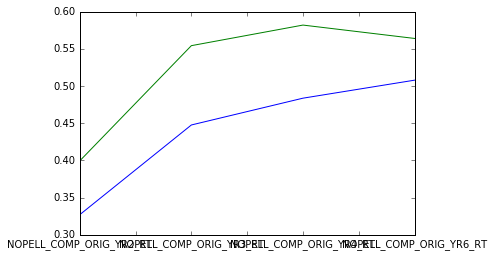

In [108]:
compl_m_pell = compl_num[['PELL_COMP_ORIG_YR2_RT', 'PELL_COMP_ORIG_YR3_RT', 
                         'PELL_COMP_ORIG_YR4_RT', 'PELL_COMP_ORIG_YR6_RT']].mean()

compl_m_nopell = compl_num[['NOPELL_COMP_ORIG_YR2_RT', 'NOPELL_COMP_ORIG_YR3_RT', 
                         'NOPELL_COMP_ORIG_YR4_RT', 'NOPELL_COMP_ORIG_YR6_RT']].mean()

compl_m_pell.plot()
compl_m_nopell.plot()


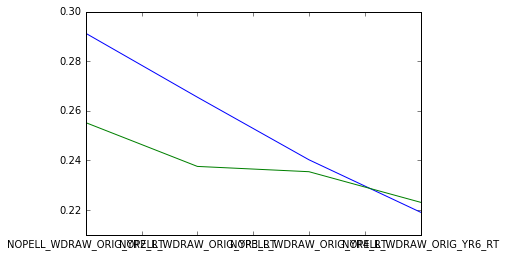

In [113]:


compl_num[['PELL_WDRAW_ORIG_YR2_RT', 'PELL_WDRAW_ORIG_YR3_RT', 
                         'PELL_WDRAW_ORIG_YR4_RT', 'PELL_WDRAW_ORIG_YR6_RT']].mean().plot()

compl_num[['NOPELL_WDRAW_ORIG_YR2_RT', 'NOPELL_WDRAW_ORIG_YR3_RT', 
                         'NOPELL_WDRAW_ORIG_YR4_RT', 'NOPELL_WDRAW_ORIG_YR6_RT']].mean().plot()




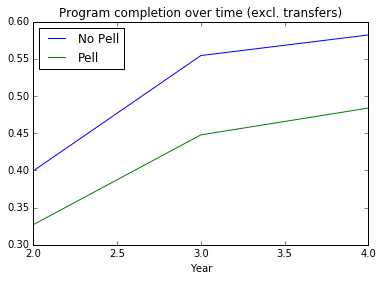

In [168]:
import numpy as np
import matplotlib.pyplot as plt

times = [2, 3, 4]

comp_pell_m = [compl_num['PELL_COMP_ORIG_YR2_RT'].mean(),
               compl_num['PELL_COMP_ORIG_YR3_RT'].mean(),
               compl_num['PELL_COMP_ORIG_YR4_RT'].mean(),
               ]

comp_nopell_m = [compl_num['NOPELL_COMP_ORIG_YR2_RT'].mean(),
                 compl_num['NOPELL_COMP_ORIG_YR3_RT'].mean(),
                 compl_num['NOPELL_COMP_ORIG_YR4_RT'].mean(),
                 ]

comp_frame = pd.DataFrame(
    {'Year': times,
     'Pell': comp_pell_m,
     'No Pell': comp_nopell_m
    })


comp_frame.fillna(method='pad').plot(x = 'Year', linestyle='-')

plt.title('Program completion over time (excl. transfers)')


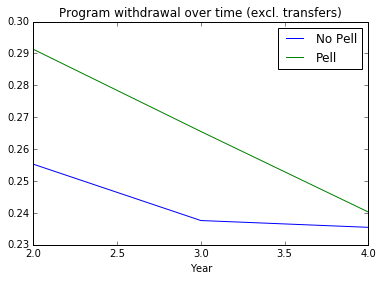

In [167]:
import numpy as np
import matplotlib.pyplot as plt

times = [2, 3, 4]

wdraw_pell_m = [compl_num['PELL_WDRAW_ORIG_YR2_RT'].mean(),
               compl_num['PELL_WDRAW_ORIG_YR3_RT'].mean(),
               compl_num['PELL_WDRAW_ORIG_YR4_RT'].mean(),
               ]

wdraw_nopell_m = [compl_num['NOPELL_WDRAW_ORIG_YR2_RT'].mean(),
                 compl_num['NOPELL_WDRAW_ORIG_YR3_RT'].mean(),
                 compl_num['NOPELL_WDRAW_ORIG_YR4_RT'].mean(),
                 ]

wdraw_frame = pd.DataFrame(
    {'Year': times,
     'Pell': wdraw_pell_m,
     'No Pell': wdraw_nopell_m
    })


wdraw_frame.fillna(method='pad').plot(x = 'Year', linestyle='-')

plt.title('Program withdrawal over time (excl. transfers)')


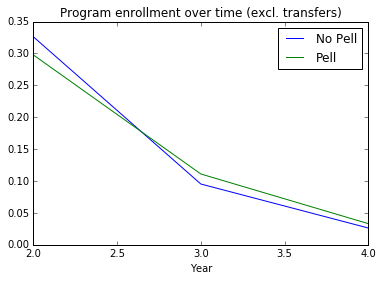

In [173]:
import numpy as np
import matplotlib.pyplot as plt

times = [2, 3, 4]

enrl_pell_m = [compl_num['PELL_ENRL_ORIG_YR2_RT'].mean(),
               compl_num['PELL_ENRL_ORIG_YR3_RT'].mean(),
               compl_num['PELL_ENRL_ORIG_YR4_RT'].mean(),
               ]

enrl_nopell_m = [compl_num['NOPELL_ENRL_ORIG_YR2_RT'].mean(),
                 compl_num['NOPELL_ENRL_ORIG_YR3_RT'].mean(),
                 compl_num['NOPELL_ENRL_ORIG_YR4_RT'].mean(),
                 ]

enrl_frame = pd.DataFrame(
    {'Year': times,
     'Pell': enrl_pell_m,
     'No Pell': enrl_nopell_m
    })


enrl_frame.fillna(method='pad').plot(x = 'Year', linestyle='-')

plt.title('Program enrollment over time (excl. transfers)')